In [1]:
import requests
import json 

# Data displayed in https://datadashboard.health.gov.il/COVID-19


headers = {
    'Accept': 'application/json, text/plain, */*',
    'Content-Type': 'application/json',}

data = {
   "requests":[
      {
         "id":"8",
         "queryName":"testResultsPerDate",
         "single":False,
         "parameters":{

         }
      }
   ]
}

response = requests.post('https://datadashboardapi.health.gov.il/api/queries/_batch', 
                         headers=headers, 
                         data=json.dumps(data))


res = response.json()

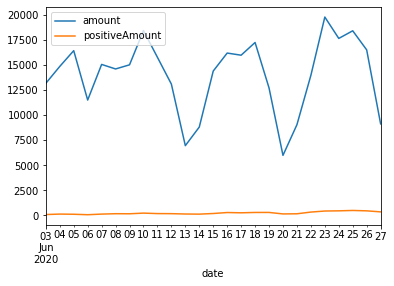

In [9]:
import pandas as pd 
df = pd.DataFrame.from_records(res[0]["data"])
df["date"] = pd.to_datetime(df["date"])

second_wave_start = pd.to_datetime('2020-06-02').date()

df = df.set_index("date")
df = df[df.index.date > second_wave_start]


df.plot()

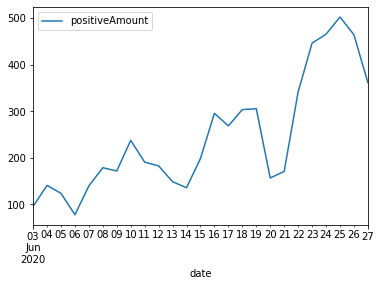

In [10]:
df.plot(y="positiveAmount")

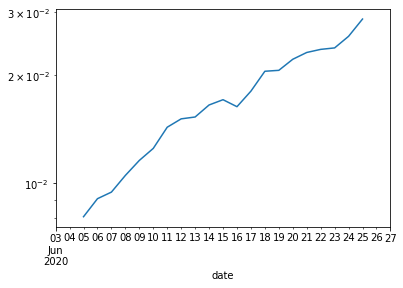

In [15]:
df["ratio"] = (df["positiveAmount"]/  df["amount"]).rolling(window=5, center=True).mean()
df["ratio"].plot(logy=True)

,date,amount,positiveAmount,ratio
0,2020-06-03 00:00:00+00:00,13209,96,NaN
1,2020-06-04 00:00:00+00:00,14898,141,NaN
2,2020-06-05 00:00:00+00:00,16473,124,0.008059
3,2020-06-06 00:00:00+00:00,11537,78,0.009050
4,2020-06-07 00:00:00+00:00,15097,140,0.009442
5,2020-06-08 00:00:00+00:00,14644,179,0.010512
6,2020-06-09 00:00:00+00:00,15057,172,0.011576
7,2020-06-10 00:00:00+00:00,18482,238,0.012508
8,2020-06-11 00:00:00+00:00,15810,191,0.014334
9,2020-06-12 00:00:00+00:00,13131,183,0.015127


In [21]:
import scipy.optimize


array([ 0.04325005,  0.02547981, -0.03649924])

[ 0.04325005  0.02547981 -0.03649924]


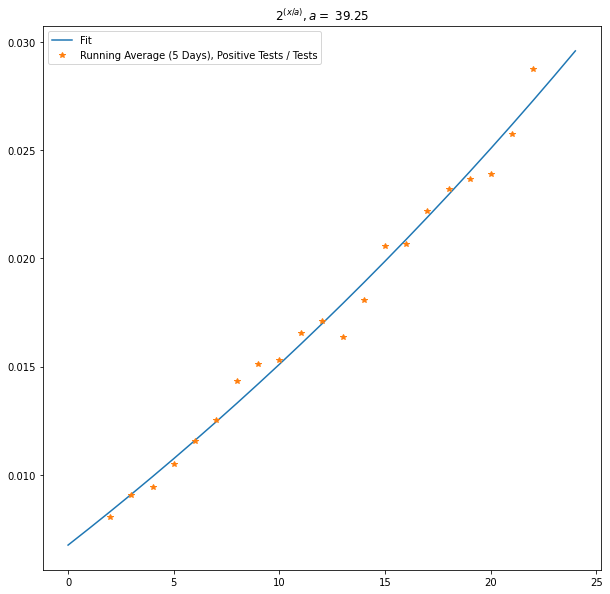

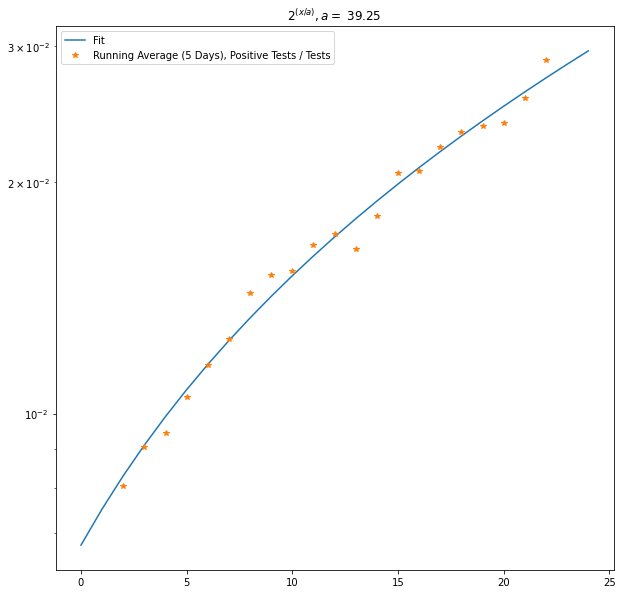

In [35]:
import pylab 
import numpy as np 
params, _ = scipy.optimize.curve_fit(lambda x, a, b, c: a * (2 ** (x*b)) + c , df.ratio.dropna().index, df.ratio.dropna())
print(params)

pylab.figure(figsize=(10,10))
pylab.plot(df.index, params[0] * 2**(params[1] * df.index) + params[2], label="Fit")
pylab.plot(df.ratio.dropna(), "*", label="Running Average (5 Days), Positive Tests / Tests")

pylab.title("$2^{(x/a)}, a=$ %.2f" % (1/params[1]))
pylab.legend()


pylab.figure(figsize=(10,10))
pylab.semilogy(df.index, params[0] * 2**(params[1] * df.index) + params[2], label="Fit")
pylab.semilogy(df.ratio.dropna(), "*", label="Running Average (5 Days), Positive Tests / Tests")

pylab.title("$2^{(x/a)}, a=$ %.2f" % (1/params[1]))
pylab.legend()

